### Detecting & Handling Imbalanced Data: Visualizing Class Imbalance
**Question**: Load the Credit Card Fraud Detection dataset and visualize the class imbalance. Then apply random undersampling to balance it.

In [1]:
!pip install pandas seaborn matplotlib scikit-learn
# write your code from here

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


/tmp/ipykernel_8953/3623638375.py:16: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/home/vscode/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


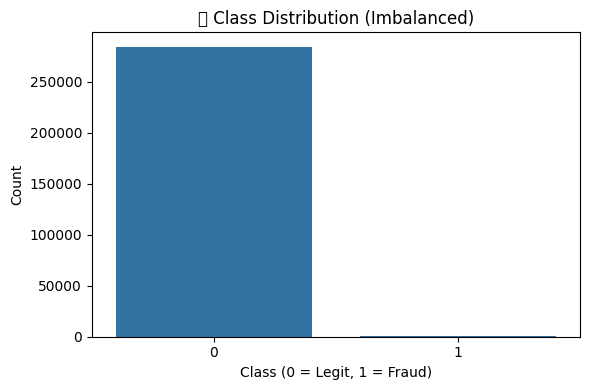


Original class counts:
Class
0    284315
1       492
Name: count, dtype: int64


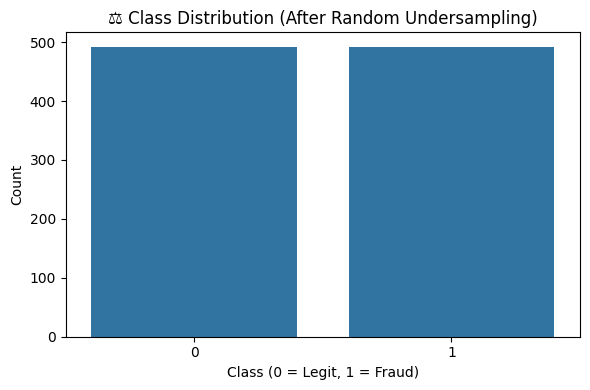


Balanced class counts:
Class
0    492
1    492
Name: count, dtype: int64


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils import resample

# Step 1: Load the dataset
url = "https://storage.googleapis.com/download.tensorflow.org/data/creditcard.csv"
df = pd.read_csv(url)

# Step 2: Visualize class distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Class')
plt.title("🔍 Class Distribution (Imbalanced)")
plt.xlabel("Class (0 = Legit, 1 = Fraud)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# Print counts
print("\nOriginal class counts:")
print(df['Class'].value_counts())

# Step 3: Undersample majority class to balance
df_majority = df[df['Class'] == 0]
df_minority = df[df['Class'] == 1]

df_majority_downsampled = resample(
    df_majority,
    replace=False,
    n_samples=len(df_minority),
    random_state=42
)

df_balanced = pd.concat([df_majority_downsampled, df_minority])

# Step 4: Visualize balanced data
plt.figure(figsize=(6, 4))
sns.countplot(data=df_balanced, x='Class')
plt.title("⚖️ Class Distribution (After Random Undersampling)")
plt.xlabel("Class (0 = Legit, 1 = Fraud)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# Print balanced counts
print("\nBalanced class counts:")
print(df_balanced['Class'].value_counts())
